# Pizza chart

Pie chart with a salty twist.

## Data entry

Place your order as a list of tuples in the form `(taste, num_of_pizza)`.

In [1]:
order = [("Wurstel e patatine", 9),
         ("Salame piccante", 3),
         ("Margherita", 10),
         ("Altro", 13)
        ]
total = [9,3,10,13]
labels = ["Wurstel e patatine", "Salame piccante", "Margherita", "Altro"]

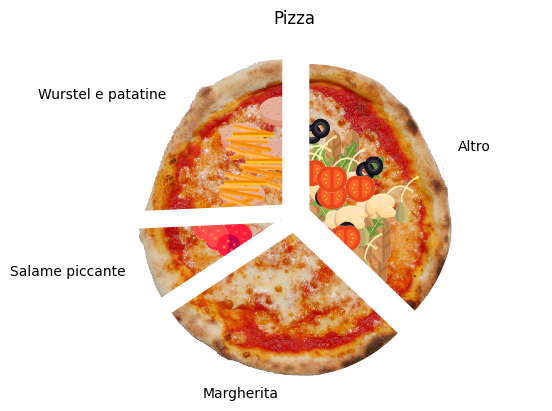

In [ ]:
# Adapted from: https://stackoverflow.com/questions/44528024/insert-image-into-pie-chart-slice/44529673#44529673

import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

labels = []
data = []
for pizza, value in order:
    labels.append(pizza)
    data.append(value)

# Create the pie chart
plt.title('Pizza')
plt.gca().axis("equal")
wedges, texts = plt.pie(data, startangle=90, labels=labels,
                        explode = [0.1] * len(labels),
                        wedgeprops = { 'linewidth': 2, 
                                      "edgecolor" :"w",
                                      "fill":False,  }
                        )

# Fill pie chart sectors with pizza images
def img_to_pie( fn, wedge, xy, zoom=1, ax = None):
    if ax==None: ax=plt.gca()
    im = plt.imread(fn, format='png')
    path = wedge.get_path()
    patch = PathPatch(path, facecolor='none')
    ax.add_patch(patch)
    imagebox = OffsetImage(im, zoom=zoom, clip_path=patch, zorder=-10)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0, frameon=False)
    ax.add_artist(ab)

for i in range(len(labels)):
    fn = os.path.join("assets",
                      "pizzas",
                      "{}.png".format(labels[i].lower().replace(" ", "_"))
                      )
    img_to_pie(fn, wedges[i], xy=(0.0, 0.0), zoom=0.45)
    wedges[i].set_zorder(10)

plt.show()
